In [1]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from rk8 import rk_error_control_perfect_first_step

In [2]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

In [3]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol = 1e-6
    (res, sol, first_deriv, error_samplings, lower_sol, lower_error_samplings) = rk_error_control_perfect_first_step(model, t_span, y0[0], tol, solution)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp
    # for this_x in xs:
    #     plt.axvline(x=this_x) 

    computed_solutions = [sol(x) for x in t_eval]
    lower_computed_solutions = [lower_sol.eval(x) for x in t_eval]
    # plt.plot(t_eval, computed_solutions, label="computed solution")

    actual_solutions = solution(t_eval)
    # plt.plot(t_eval, actual_solutions, label="actual solution")

    # removed rk45 plt.title("solution vs rk45 vs rk6 vs rk6_interpolated")
    # plt.title(f"actual solution vs interpolated solution tol={tol}")
    # plt.xlabel("t")
    # plt.ylabel('y')
    # plt.legend(loc="upper right")
    # plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(computed_solutions, actual_solutions)]
    lower_error = [abs(lower_computed_solution - actual_solution) for (lower_computed_solution, actual_solution) in zip(lower_computed_solutions, actual_solutions)]
    # for this_x in xs:
    #     plt.axvline(x=this_x) 
    plt.plot(t_eval, error, label="higher_order")
    plt.plot(t_eval, lower_error, label="lower_order")
    # plt.title(f"global error for tol={tol}")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    # shape of errors - graphs
    plt.figure()
    for (x_i, x_i_plus_1, hb) in error_samplings:
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        errors = []
        for i, pt in enumerate(pts_to_sample):
            y = solution([pt])[0]
            hb_eval = hb.eval(pt)
            error = abs(hb_eval - y)
            errors.append( error )

        maximum_error = max(errors)
        scaled_errors = [error / (maximum_error) for error in errors]

        # str_x_i = "{:.3f}".format(x_i)
        # str_x_i_plus_1 = "{:.3f}".format(x_i_plus_1)
        x_axis = [i/(num_points - 1) for i in range(num_points)]
        plt.plot(x_axis, scaled_errors, label=f"x_{str(x_i)}_{str(x_i_plus_1)}")
    plt.title("plot of shape of exact errors of HIGHER ORDER")
    plt.xlabel(r"$x_i$ to $x_{i+1}$")
    plt.ylabel('scaled exact errors')
    # plt.legend()
    plt.show()

    plt.figure()
    for (x_i, x_i_plus_1, hb) in lower_error_samplings:
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        errors = []
        for i, pt in enumerate(pts_to_sample):
            y = solution([pt])[0]
            hb_eval = hb.eval(pt)
            error = abs(hb_eval - y)
            errors.append( error )

        maximum_error = max(errors)
        scaled_errors = [error / (maximum_error) for error in errors]

        # str_x_i = "{:.3f}".format(x_i)
        # str_x_i_plus_1 = "{:.3f}".format(x_i_plus_1)
        x_axis = [i/(num_points - 1) for i in range(num_points)]
        plt.plot(x_axis, scaled_errors, label=f"x_{str(x_i)}_{str(x_i_plus_1)}")
    plt.title("plot of shape of exact errors of LOWER ORDER")
    plt.xlabel(r"$x_i$ to $x_{i+1}$")
    plt.ylabel('scaled exact errors')
    # plt.legend()
    plt.show()

    plt.figure()
    for ((x_i, x_i_plus_1, lower_hb), (_, _, higher_hb)) in zip(lower_error_samplings, error_samplings):
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        errors = []
        for i, pt in enumerate(pts_to_sample):
            lower_hb_eval  = lower_hb.eval(pt)
            higher_hb_eval = higher_hb.eval(pt)
            error = abs(lower_hb_eval - higher_hb_eval)
            errors.append( error )

        maximum_error = max(errors)
        scaled_errors = [error / (maximum_error) for error in errors]

        # str_x_i = "{:.3f}".format(x_i)
        # str_x_i_plus_1 = "{:.3f}".format(x_i_plus_1)
        x_axis = [i/(num_points - 1) for i in range(num_points)]
        plt.plot(x_axis, scaled_errors, label=f"x_{str(x_i)}_{str(x_i_plus_1)}")
    plt.title("plot of shape of ESTIMATED errors between interpolants")
    plt.xlabel(r"$x_i$ to $x_{i+1}$")
    plt.ylabel('scaled estimated errors')
    # plt.legend()
    plt.show()

    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 0.4999999999999997, 0.5000000000000003, 1.0000000000000007, 0.5]
beta values [0.9999999999999994, 1.0000000000000002, 2.0000000000000004, 2.0000000000000013, 1.999999999999999, 1.0, 2.0]
n_steps 16
n_successful_steps 14


Monitor10
alpha values [0.9999999999999994, 1.9999999999999984, 2.0000000000000004, 2.0, 1.0000000000000007, 2.0000000000000013, 0.9999999999999989, 1.9999999999999978, 1.0]
beta values [1.999999999999999, 2.0, 2.0000000000000013, 3.9999999999999956, 4.000000000000001, 4.000000000000003, 1.9999999999999978]
n_steps 0
n_successful_steps 0

integration complete


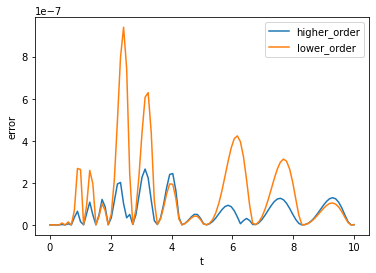

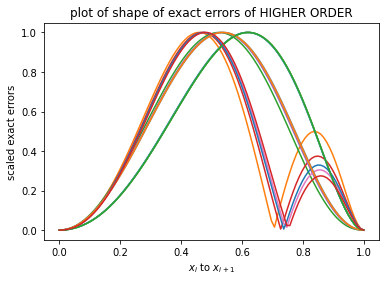

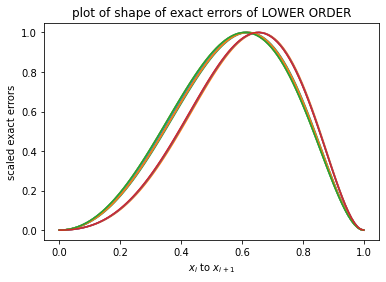

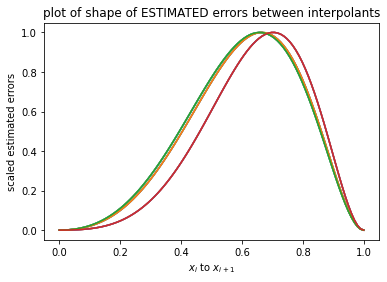

0.0
0.0
0.0
2.220446049250313e-16
4.207745263329343e-14
4.085620730620576e-14
2.720379477239021e-12
2.387756659061324e-12
1.9576562593215385e-12
1.1221024109886457e-11
9.15401088263934e-12
7.262634937887924e-12
5.90316684423442e-12
8.303413512322777e-12
6.630251903061435e-12
5.2755022572625876e-12
1.2935874593722474e-11


In [4]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 0.4999999999999997, 0.5000000000000003, 0.5, 1.0000000000000007]
beta values [0.9999999999999994, 1.0000000000000002, 2.0, 2.0000000000000013, 1.999999999999999, 1.0]
n_steps 21
n_successful_steps 17


Monitor10
alpha values [0.9999999999999989, 1.9999999999999984, 2.0000000000000004, 2.0, 1.9999999999999978, 1.0000000000000007, 1.0, 2.000000000000002, 2.0000000000000036]
beta values [1.9999999999999978, 2.0, 2.0000000000000013, 3.9999999999999956, 4.0, 4.000000000000003, 2.000000000000002, 4.000000000000007]
n_steps 0
n_successful_steps 0

integration complete


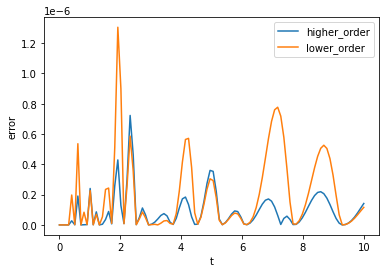

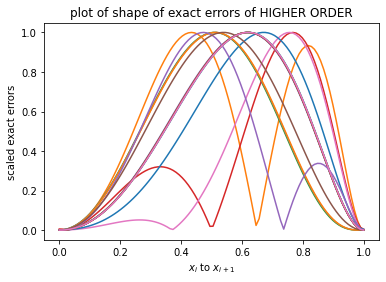

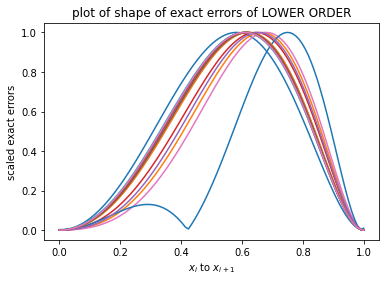

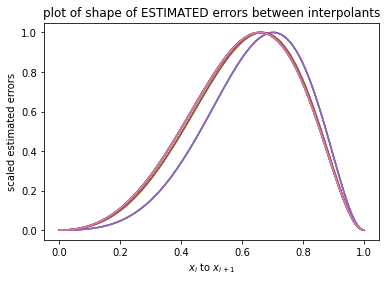

0.0
0.0
0.0
1.9317880628477724e-14
3.516087421218117e-11
3.743239052056424e-11
2.8444024913198973e-11
2.0101309505804466e-11
1.3881729099551876e-11
3.6532582514681167e-10
2.2227469864688487e-10
1.2638215474147785e-10
7.51287088096575e-11
2.9649786792429467e-10
1.5038272016543175e-10
8.056048189652998e-11
4.667341860220553e-11
6.778610311952704e-11
3.3559910059266507e-11
1.7934024057475462e-11


In [5]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 0.49999999999999994, 0.4999999999999999, 0.5000000000000003, 0.5000000000000001, 1.0000000000000002]
beta values [0.9999999999999998, 1.9999999999999998, 1.0000000000000002, 2.0000000000000004, 1.999999999999999, 1.0, 2.0, 2.0000000000000013]
n_steps 15
n_successful_steps 10


Monitor10
alpha values [0.9999999999999994, 1.9999999999999984, 2.0000000000000004, 0.9999999999999998, 1.0000000000000007, 0.9999999999999999, 2.0, 1.9999999999999978]
beta values [1.9999999999999996, 2.0000000000000013, 3.9999999999999996, 3.9999999999999956, 4.000000000000001, 3.999999999999999, 3.9999999999999982, 4.000000000000003, 2.0, 4.0, 1.9999999999999978]
n_steps 0
n_successful_steps 0

integration complete


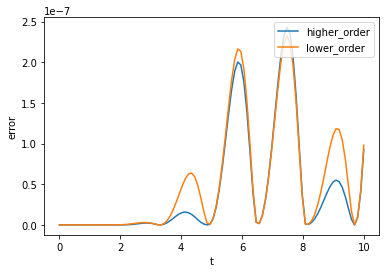

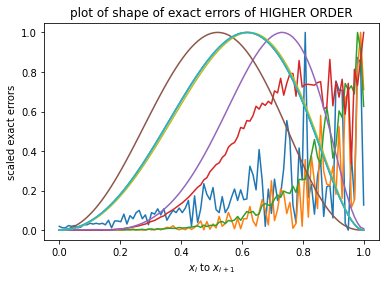

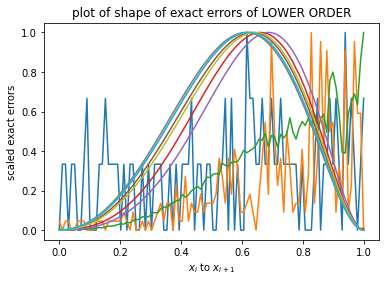

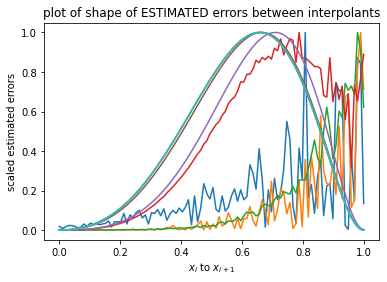

0.0
0.0
0.0
2.220446049250313e-16
4.440892098500626e-16
3.1086244689504383e-15
7.327471962526033e-15
9.561240688071848e-13
1.3216094885137863e-12
7.549516567451064e-14
3.126388037344441e-12
4.4853010194856324e-12
1.8705037518884637e-12


In [6]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

tolerance= 1e-06
Monitor8
alpha values [0.5, 1.0, 0.9999999999999978, 1.0000000000000022, 1.0000000000000044, 0.9999999999999911, 1.0000000000000089, 7.999999999999994, 3.999999999999929, 2.0, 0.5000000000000089, 2.000000000000142, 1.0000000000000355, 4.000000000000284, 0.4999999999999645, 0.9999999999999645, 0.9999999999999822]
beta values [0.4999999999999999, 1.0000000000000002, 0.24999999999999994, 0.1250000000000001, 1.0, 2.0, 1.9999999999999978, 0.9999999999999978, 2.0000000000000044, 1.0000000000000022, 1.9999999999999956, 2.000000000000009, 1.0000000000000089, 1.9999999999999822, 0.5, 1.9999999999999645, 2.0000000000000178, 2.000000000000142, 2.000000000000071, 0.5000000000000089, 0.4999999999999645, 0.9999999999999645, 0.25000000000000444, 0.9999999999999956, 1.0000000000000178, 0.24999999999998224, 1.0000000000000355, 0.9999999999999911]
n_steps 806
n_successful_steps 426


Monitor10
alpha values [1.0, 2.0000000000000004, 2.0, 2.000000000000009, 1.9999999999999867, 1.999999999

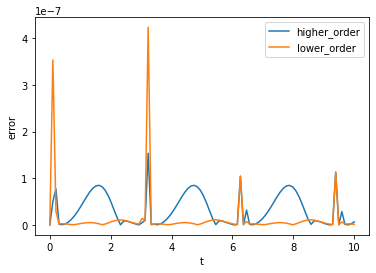

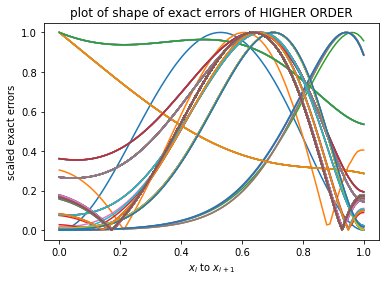

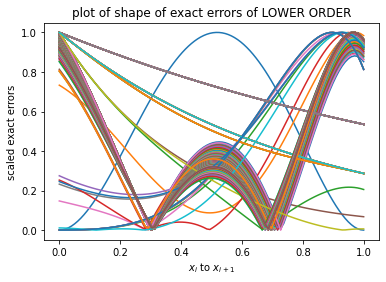

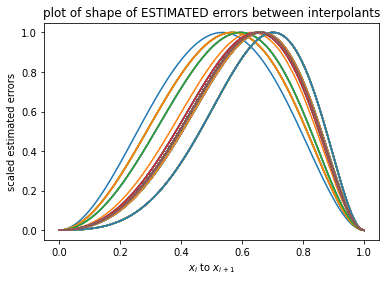

0.0
0.0
0.0
9.54542000997094e-13
1.2813083927198932e-12
2.7599300067571164e-09
3.3069673111008058e-09
3.6707735184826618e-09
4.017460086824798e-09
4.360428906835523e-09
4.700549505187723e-09
5.03768127213533e-09
5.371731115477729e-09
5.702418703901202e-09
6.029505894566967e-09
6.352841919188279e-09
6.672234653670728e-09
6.987416090176168e-09
7.298244564246659e-09
7.604539664640697e-09
7.906061916251872e-09
8.202595824791103e-09
8.494093317601425e-09
8.780222882087685e-09
9.060888261913647e-09
9.335855200021115e-09
9.605026440873132e-09
9.868182604400033e-09
1.0125172589248166e-08
1.0375825865160948e-08
1.0620012980133708e-08
1.0857549637144359e-08
1.1088295504002588e-08
1.1312125680618124e-08
1.152886719424373e-08
1.1738424898766198e-08
1.1940633926066369e-08
1.2135384475087108e-08
1.2322552200849657e-08
1.2502019086646499e-08
1.2673656790695986e-08
1.2837403806642556e-08
1.299310115054908e-08
1.3140683208234805e-08
1.328006704603979e-08
1.3411140087349338e-08
1.3533832721179806e-08
1.

In [7]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 2.0000000000000013, 1.9999999999999978, 0.5, 1.0000000000000022, 2.0000000000000044, 0.4999999999999978, 2.000000000000009, 1.0000000000000044, 2.0, 1.9999999999999645, 3.999999999999929, 4.000000000000284, 0.4999999999999645, 0.5000000000000089]
beta values [0.9999999999999994, 1.0000000000000002, 0.4999999999999997, 1.0, 0.5000000000000006, 2.0, 1.9999999999999978, 0.9999999999999978, 2.0000000000000044, 1.0000000000000022, 2.000000000000009, 0.5, 1.9999999999999645, 2.000000000000142, 0.5000000000000089, 0.4999999999999989, 0.25000000000000444, 0.9999999999999956, 1.9999999999999956, 0.24999999999998224, 0.4999999999999978]
n_steps 406
n_successful_steps 266


Monitor10
alpha values [0.9999999999999911, 1.9999999999999984, 2.0000000000000004, 3.9999999999999956, 4.000000000000007, 1.9999999999999978, 2.0, 2.000000000000009, 1.9999999999999911, 1.0, 4.000000000000009, 4.000000000000018, 3.999999999999929, 2.000000000000

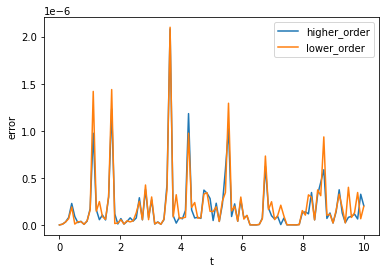

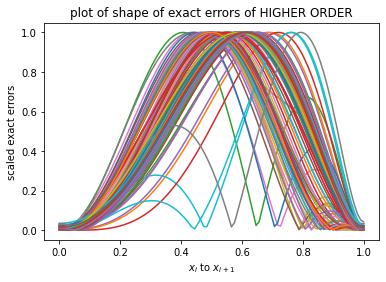

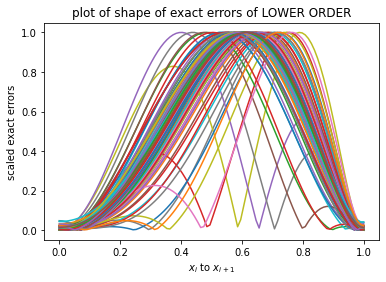

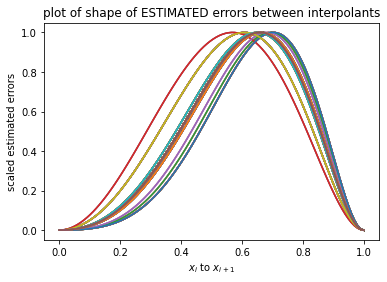

0.0
0.0
0.0
1.7463364088143862e-11
2.7479352127102175e-11
1.0460543542478717e-10
1.2040102248533913e-10
1.367441715416362e-10
1.4184720065202328e-10
1.2254242065523613e-10
9.840661618909508e-11
8.509482007923452e-11
7.418088365795938e-11
6.558198428763262e-11
4.2739589645179876e-11
3.708722218220828e-11
3.469846632242479e-11
3.432587547536059e-11
3.5855318714084206e-11
3.9673597740375044e-11
4.758238247859481e-11
8.2641005150208e-11
9.492184815940163e-11
1.0930256699737129e-10
1.2499246082597892e-10
1.3121925768189158e-10
1.173297015100161e-10
9.191447603029701e-11
7.917333455509379e-11
6.892131310110017e-11
6.080269621122625e-11
3.630962197576082e-11
3.113376223495834e-11
2.900968354424549e-11
2.8618885039577435e-11
2.979794189172935e-11
3.285460792312733e-11
3.91986443304404e-11
6.808464902974265e-11
7.808531599096113e-11
8.99229579687244e-11
1.035616037370346e-10
1.1036616065496219e-10
1.019258011325519e-10
7.645750699225573e-11
6.526490459179968e-11
5.6766147338294104e-11
4.9944937

In [8]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 0.4999999999999997, 0.5000000000000003, 0.5, 1.0000000000000007]
beta values [0.9999999999999994, 1.0000000000000002, 2.0000000000000004, 2.0000000000000013, 1.999999999999999, 1.0, 2.0]
n_steps 19
n_successful_steps 15


Monitor10
alpha values [0.9999999999999989, 1.9999999999999984, 2.0000000000000004, 2.0, 1.0000000000000007, 1.0, 2.000000000000002, 2.0000000000000013, 1.9999999999999978]
beta values [1.9999999999999978, 2.0, 2.0000000000000013, 3.9999999999999956, 4.000000000000001, 4.000000000000003, 4.0, 4.000000000000007]
n_steps 0
n_successful_steps 0

integration complete


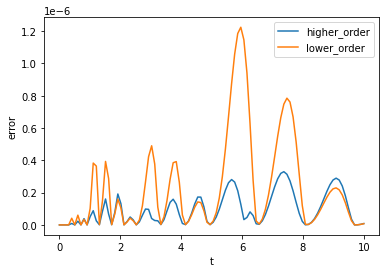

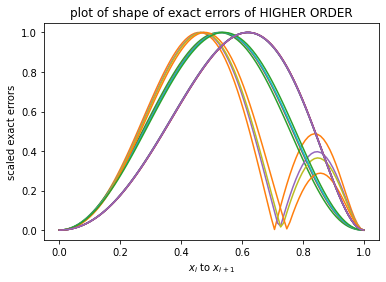

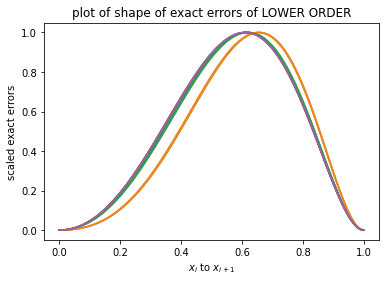

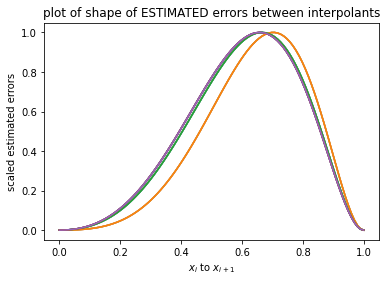

0.0
0.0
0.0
1.9984014443252818e-15
4.9960036108132044e-15
4.6629367034256575e-15
6.106226635438361e-15
1.099120794378905e-14
8.271161533457416e-15
6.938893903907228e-15
5.662137425588298e-15
9.159339953157541e-16
2.498001805406602e-16
9.992007221626409e-16
1.5265566588595902e-15
1.5543122344752192e-15
6.106226635438361e-16
1.0685896612017132e-15


In [9]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 0.49999999999999994, 0.4999999999999999, 0.5000000000000003, 2.000000000000001, 0.4999999999999997, 2.0000000000000013, 1.0000000000000007, 0.9999999999999989]
beta values [0.9999999999999996, 1.9999999999999998, 1.0000000000000002, 2.0000000000000004, 1.999999999999999, 0.4999999999999998, 2.0000000000000013, 0.9999999999999994, 0.4999999999999997, 2.0, 1.0, 1.9999999999999978, 1.000000000000001]
n_steps 24
n_successful_steps 16


Monitor10
alpha values [0.9999999999999994, 1.9999999999999984, 2.0000000000000004, 0.9999999999999998, 1.0000000000000007, 4.000000000000002, 0.9999999999999989, 4.000000000000007, 1.999999999999999, 2.000000000000002, 1.9999999999999978, 2.0]
beta values [0.9999999999999994, 1.999999999999999, 2.0000000000000013, 3.9999999999999996, 3.9999999999999956, 4.000000000000001, 3.999999999999999, 4.000000000000003, 1.9999999999999978, 0.9999999999999989, 4.000000000000007, 3.999999999999998, 2.00000

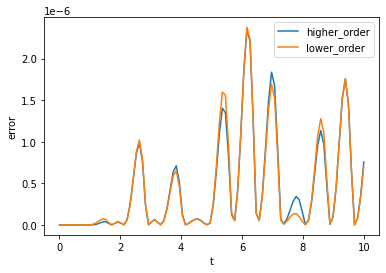

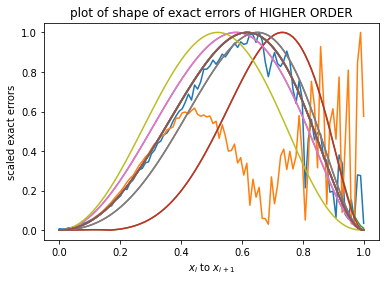

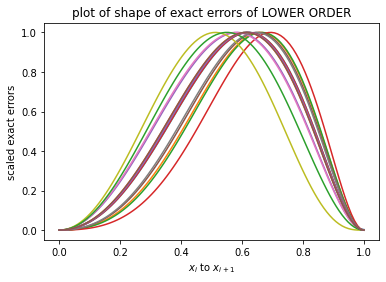

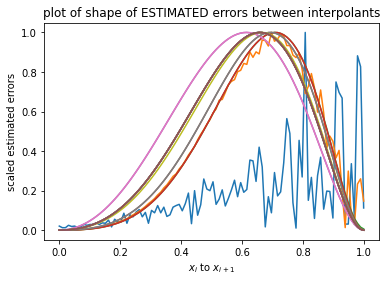

0.0
0.0
0.0
0.0
7.771561172376096e-16
4.9960036108132044e-15
2.0823481827747514e-12
2.0021762026090073e-12
3.906874823655926e-13
3.779199175824033e-13
3.4294234119158773e-12
4.52646253812361e-12
3.304245765889391e-12
7.751577157932843e-13
1.476541111600227e-12
2.238043084190622e-12
1.3408718579910328e-12
4.595768210435835e-13
1.981553809926595e-12


In [10]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 0.4999999999999999, 0.5000000000000003, 1.0000000000000007, 0.4999999999999997, 0.5]
beta values [0.9999999999999994, 1.0000000000000002, 2.0000000000000004, 1.999999999999999, 1.0, 2.0000000000000013, 2.0]
n_steps 19
n_successful_steps 15


Monitor10
alpha values [0.9999999999999994, 1.9999999999999984, 2.0000000000000004, 2.0000000000000013, 1.0000000000000007, 1.9999999999999978, 2.000000000000002, 0.9999999999999989, 1.999999999999999, 1.0]
beta values [1.9999999999999996, 2.0000000000000013, 3.9999999999999956, 4.000000000000001, 1.9999999999999978, 4.000000000000003, 2.0, 4.000000000000007, 2.000000000000002]
n_steps 0
n_successful_steps 0

integration complete


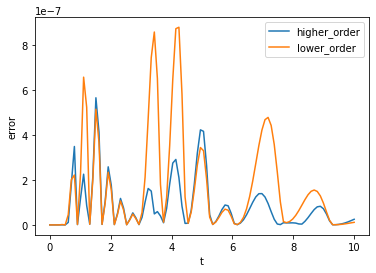

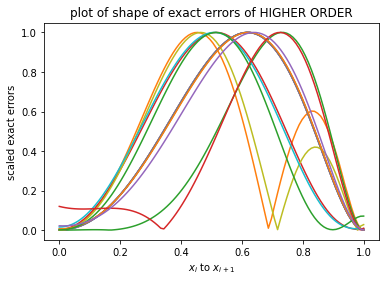

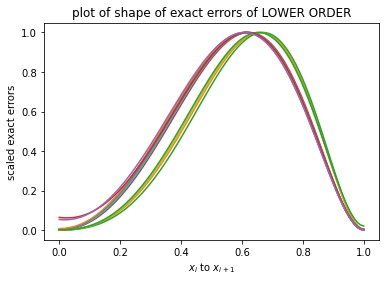

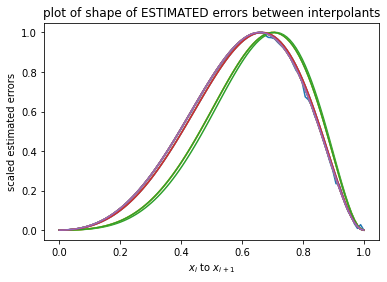

0.0
0.0
0.0
1.2323475573339238e-14
1.5941692410592623e-12
6.788296036397412e-10
6.097554128281502e-10
4.1087044877485823e-10
2.461841841494561e-10
1.3825163236447224e-10
7.447886751776878e-11
4.677734866120886e-09
1.8859589445696656e-09
5.707141426114504e-10
1.5334000735833797e-10
1.0002663142216761e-08
7.99987631694421e-10
4.802647168844487e-11


In [11]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [12]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

# t_span_8 = [0, 10]
# eps = 0.1
# a = exp(-1/eps)
# y0_8 = [1, a/(eps*(-1+a))]

# def model8(t, y):
#     return [y[1], y[0]/eps]

# def solution8(t):
#     # THE experiment method calculates error on "computed[0]"
#     # so we can only verify the error of y[0] there
#     return [(1-exp(x/eps)*a)/(1-a) for x in t]

# experiment(model8, y0_8, t_span_8, solution8)

# ## the results were extremely bad. So i wanted to see the solution
# plt.figure()
# plt.plot(t_span_8, solution8(t_span_8))



In [13]:
# Jeff cash test set second one
# t_span_9 = [0, 10]
# eps = 0.1
# y0_9 = [1, -1/sqrt(eps)]

# def model9(t, y):
#     return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

# def solution9(t):
#     # THE experiment method calculates error on "computed[0]"
#     # so we can only verify the error of y[0] there
#     return [exp(-x/sqrt(eps)) for x in t]

# experiment(model9, y0_9, t_span_9, solution9)

In [14]:
# Wolfram Alpha first problem

# t_span_10 = [0, 10]
# y0_10 = [1, 2]

# def model10(t, y):
#     return [y[1], -3*y[0] + 2*cos(4*t)]

# def solution10(t):
#     # THE experiment method calculates error on "computed[0]"
#     # so we can only verify the error of y[0] there
#     s = sqrt(3)
#     return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

# experiment(model10, y0_10, t_span_10, solution10)